In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.optimize as sco

In [17]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Read the tables on the Wikipedia page
tables = pd.read_html(url)

# The first table on the page contains the list of S&P 500 companies
sp500_table = tables[0]

# Select relevant columns: 'Symbol' and 'GICS Sector'
sp500_companies = sp500_table[['Symbol', 'GICS Sector']]

# Reset the index for better readability
sp500_companies.reset_index(drop=True, inplace=True)

tickers=[]

for i in range (len(sp500_companies)):
    tickers.append(sp500_companies['Symbol'][i])


In [18]:
# ==============================
# STEP 2: FETCH STOCK DATA
# ==============================

def fetch_stock_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

start_date = "2018-01-01"
end_date = "2021-01-01"


# Fetch stock data
data = fetch_stock_data(tickers, start_date, end_date)

# Save raw data
data

[*********************100%***********************]  503 of 503 completed

9 Failed downloads:
['KVUE', 'CEG', 'SOLV', 'GEV', 'GEHC', 'SW', 'VLTO']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2021-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1609477200")')
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2021-01-01)')


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,83.061348,72.796013,71.589775,NaN,79.273941,41.268997,195.263596,334.429993,109.912376,40.313679,...,190.670776,24.381451,139.762299,53.556572,55.631180,75.240524,93.090324,139.312698,259.140015,128.819443
2020-01-03 00:00:00+00:00,81.727707,72.088295,70.910255,NaN,78.307518,41.221451,194.938385,331.809998,107.977516,40.234989,...,190.717468,24.422932,137.689194,53.814121,55.183926,75.683388,92.798767,138.948486,256.049988,128.838684
2020-01-06 00:00:00+00:00,81.969315,72.662712,71.469872,NaN,78.717796,41.383106,193.665405,333.709991,106.708893,39.920246,...,190.950790,24.373158,137.416687,53.736858,55.607632,75.193405,92.744102,138.145477,258.010010,127.849503
2020-01-07 00:00:00+00:00,82.220581,72.320976,71.062157,NaN,78.280167,41.040779,189.484161,333.390015,109.136604,39.439384,...,190.558807,24.215536,138.068787,53.625237,55.152531,74.910728,92.908104,138.024139,256.470001,128.281677
2020-01-08 00:00:00+00:00,83.032341,73.484344,71.565781,NaN,78.599266,40.631893,189.855850,337.869995,110.122276,39.002247,...,190.773499,24.306789,138.934998,53.573734,54.320820,75.165146,93.072105,139.676834,247.639999,128.003159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,114.099907,129.047546,87.120018,154.839996,100.342140,33.148323,242.911530,499.859985,134.571640,44.688213,...,199.859726,28.590496,112.267151,56.946896,35.247952,95.712334,99.868500,140.470215,376.890015,155.229446
2020-12-28 00:00:00+00:00,114.605675,133.663010,87.280319,149.000000,99.823509,33.595245,245.158432,498.950012,134.767197,44.923225,...,196.208084,28.472248,113.327110,57.554874,35.366570,95.826927,101.948677,140.131409,382.589996,156.842377
2020-12-29 00:00:00+00:00,114.022102,131.883301,88.334923,150.000000,100.323608,33.566719,243.345825,502.109985,133.817108,44.697254,...,196.066528,28.151295,112.188629,57.642990,34.968342,95.005836,101.642235,143.482010,378.040009,157.547440


In [24]:
data=data.dropna(axis=1)
data

Ticker,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,83.061348,72.796013,71.589775,79.273941,41.268997,195.263596,334.429993,109.912376,40.313679,153.205917,...,190.670776,24.381451,139.762299,53.556572,55.631180,75.240524,93.090324,139.312698,259.140015,128.819443
2020-01-03 00:00:00+00:00,81.727707,72.088295,70.910255,78.307518,41.221451,194.938385,331.809998,107.977516,40.234989,152.882080,...,190.717468,24.422932,137.689194,53.814121,55.183926,75.683388,92.798767,138.948486,256.049988,128.838684
2020-01-06 00:00:00+00:00,81.969315,72.662712,71.469872,78.717796,41.383106,193.665405,333.709991,106.708893,39.920246,153.088959,...,190.950790,24.373158,137.416687,53.736858,55.607632,75.193405,92.744102,138.145477,258.010010,127.849503
2020-01-07 00:00:00+00:00,82.220581,72.320976,71.062157,78.280167,41.040779,189.484161,333.390015,109.136604,39.439384,151.235992,...,190.558807,24.215536,138.068787,53.625237,55.152531,74.910728,92.908104,138.024139,256.470001,128.281677
2020-01-08 00:00:00+00:00,83.032341,73.484344,71.565781,78.599266,40.631893,189.855850,337.869995,110.122276,39.002247,152.657227,...,190.773499,24.306789,138.934998,53.573734,54.320820,75.165146,93.072105,139.676834,247.639999,128.003159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00+00:00,114.099907,129.047546,87.120018,100.342140,33.148323,242.911530,499.859985,134.571640,44.688213,162.681839,...,199.859726,28.590496,112.267151,56.946896,35.247952,95.712334,99.868500,140.470215,376.890015,155.229446
2020-12-28 00:00:00+00:00,114.605675,133.663010,87.280319,99.823509,33.595245,245.158432,498.950012,134.767197,44.923225,162.727936,...,196.208084,28.472248,113.327110,57.554874,35.366570,95.826927,101.948677,140.131409,382.589996,156.842377
2020-12-29 00:00:00+00:00,114.022102,131.883301,88.334923,100.323608,33.566719,243.345825,502.109985,133.817108,44.697254,161.124680,...,196.066528,28.151295,112.188629,57.642990,34.968342,95.005836,101.642235,143.482010,378.040009,157.547440


In [25]:
# ==============================
# STEP 3: CALCULATE RETURNS & VOLATILITY
# ==============================
data=data.dropna()
returns = data.pct_change().dropna()
volatility = returns.rolling(window=20).std().dropna()

# Feature set for clustering
features = pd.DataFrame({
    "mean_return": returns.mean(),
    "volatility": volatility.mean(),
    "cumulative_return": (data.iloc[-1] / data.iloc[0]) - 1,
    "annualized_return": returns.mean() * 252,
    "rolling_mean_return_20": returns.rolling(window=20).mean().mean(),
    "rolling_volatility_50": returns.rolling(window=50).std().mean(),
    "max_drawdown": (data / data.cummax() - 1).min(),
    "sharpe_ratio": returns.mean() / returns.std(),
    "sortino_ratio": returns.mean() / returns[returns < 0].std(),
    "var_95": returns.quantile(0.05)
})

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

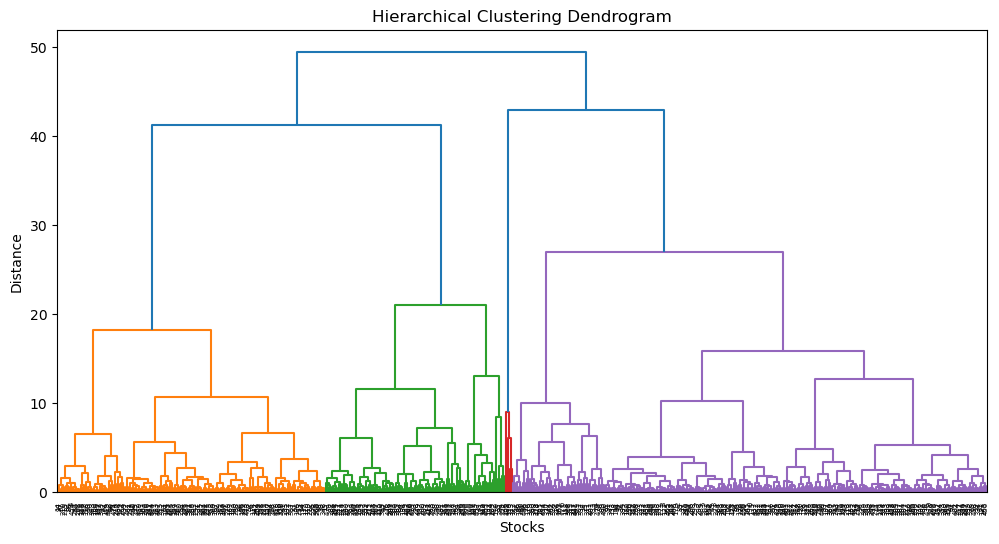

In [29]:
# ==============================
# STEP 4: APPLY HIERARCHICAL CLUSTERING
# ==============================

n_clusters = 11  # Set number of clusters
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
features['cluster'] = hierarchical.fit_predict(scaled_features)

# Save cluster results
features.to_csv("clustered_data.csv")

# ==============================
# STEP 5: DENDROGRAM VISUALIZATION
# ==============================

plt.figure(figsize=(12, 6))
dendrogram(linkage(scaled_features, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Stocks")
plt.ylabel("Distance")
plt.show()

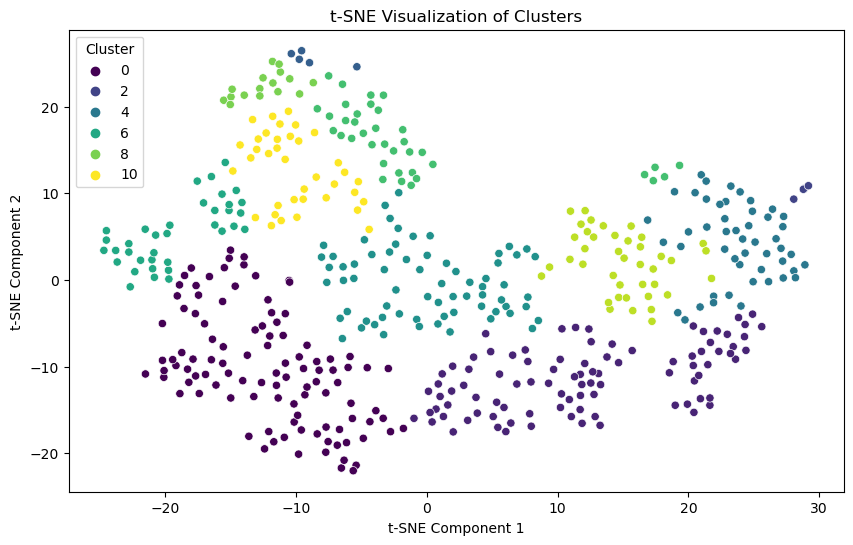

In [30]:
# ==============================
# STEP 6: t-SNE VISUALIZATION
# ==============================

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate='auto')
tsne_results = tsne.fit_transform(scaled_features)

features['tsne_1'] = tsne_results[:, 0]
features['tsne_2'] = tsne_results[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne_1', y='tsne_2', hue=features['cluster'], palette='viridis', data=features)
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()

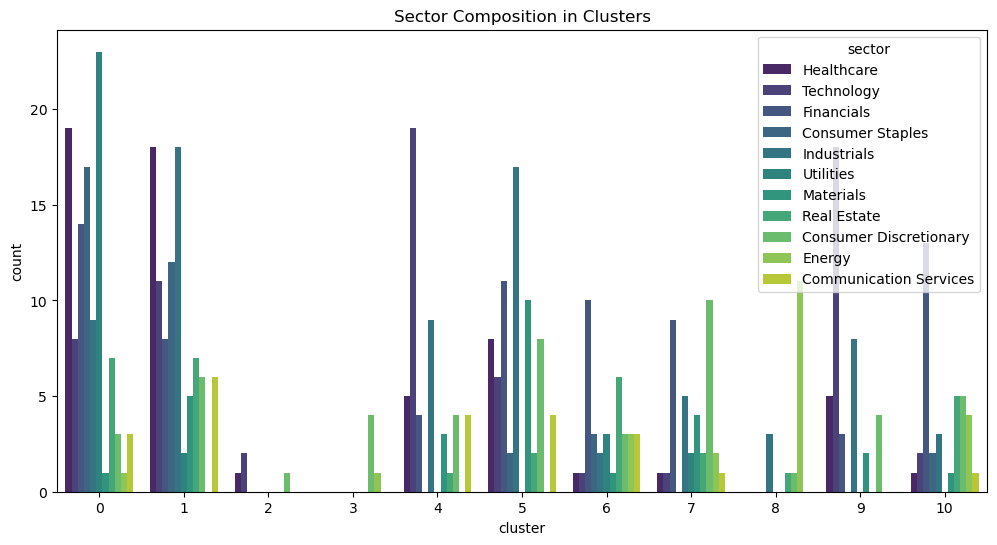

In [31]:
# Create the sector mapping dictionary using the exact format required
sector_map = {
    **dict.fromkeys(sp500_companies[sp500_companies["GICS Sector"] == "Information Technology"]["Symbol"].tolist(), "Technology"),
    **dict.fromkeys(sp500_companies[sp500_companies["GICS Sector"] == "Financials"]["Symbol"].tolist(), "Financials"),
    **dict.fromkeys(sp500_companies[sp500_companies["GICS Sector"] == "Health Care"]["Symbol"].tolist(), "Healthcare"),
    **dict.fromkeys(sp500_companies[sp500_companies["GICS Sector"] == "Consumer Discretionary"]["Symbol"].tolist(), "Consumer Discretionary"),
    **dict.fromkeys(sp500_companies[sp500_companies["GICS Sector"] == "Communication Services"]["Symbol"].tolist(), "Communication Services"),
    **dict.fromkeys(sp500_companies[sp500_companies["GICS Sector"] == "Industrials"]["Symbol"].tolist(), "Industrials"),
    **dict.fromkeys(sp500_companies[sp500_companies["GICS Sector"] == "Consumer Staples"]["Symbol"].tolist(), "Consumer Staples"),
    **dict.fromkeys(sp500_companies[sp500_companies["GICS Sector"] == "Energy"]["Symbol"].tolist(), "Energy"),
    **dict.fromkeys(sp500_companies[sp500_companies["GICS Sector"] == "Utilities"]["Symbol"].tolist(), "Utilities"),
    **dict.fromkeys(sp500_companies[sp500_companies["GICS Sector"] == "Real Estate"]["Symbol"].tolist(), "Real Estate"),
    **dict.fromkeys(sp500_companies[sp500_companies["GICS Sector"] == "Materials"]["Symbol"].tolist(), "Materials"),
}

features['sector'] = features.index.map(sector_map)

plt.figure(figsize=(12, 6))
sns.countplot(x='cluster', hue='sector', data=features, palette="viridis")
plt.title("Sector Composition in Clusters")
plt.show()